<bold>Authors:</bold> Samantha Nthamane Maphake and Oratile Pitsoane <br>
<bold>Date:</bold> 18 August 2024

## Importing the necessary libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading data

In [212]:
dataset = pd.read_csv('CustData2.csv',on_bad_lines='skip', delimiter=';')

# Checking the columns and rows

In [213]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191323 entries, 0 to 191322
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Last.Name                              191317 non-null  object 
 1   First.Name                             191317 non-null  object 
 2   Middle.Initial                         132267 non-null  object 
 3   Title                                  191317 non-null  object 
 4   Department.Name                        191317 non-null  object 
 5   Annual.Salary                          191317 non-null  float64
 6   Gross.Pay.Last.Paycheck                191317 non-null  float64
 7   Gross.Year.To.Date                     191317 non-null  float64
 8   Gross.Year.To.Date...FRS.Contribution  191317 non-null  float64
 9   year_of_birth                          191323 non-null  int64  
 10  marital_status                         130528 non-null  

None

## Checking the first 5 columns

In [214]:
dataset.head()

,Last.Name,First.Name,Middle.Initial,Title,Department.Name,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,...,postal_code,city,state_province,Country_id,phone_number,email,Education,Occupation,household_size,yrs_residence
0,ALBERT,JESSICA,M,CORRECTIONAL OFFICER,CORRECTIONS & REHABILITATION,54619.76,2501.62,48025.48,46616.58,1976,...,60332,Ede,Gelderland,52770,519-236-6123,Ruddy@company.com,Masters,Prof.,2,4
1,ARGUELLO,ADRIAN,A,POLICE OFFICER,POLICE,65250.38,3467.63,57932.07,56222.79,1964,...,55406,Hoofddorp,Noord-Holland,52770,327-194-5008,Ruddy@company.com,Masters,Prof.,2,4
2,TUCKER,KEVIN,K,CORRECTIONAL OFFICER,CORRECTIONS & REHABILITATION,62393.76,4513.71,49968.35,48501.19,1942,...,34077,Schimmert,Limburg,52770,288-613-9676,Ruddy@company.com,Masters,Prof.,2,4
3,DELL,JAMES,A,WASTE SCALE OPERATOR,SOLID WASTE MANAGEMENT,37735.10,1561.67,35469.59,34432.85,1977,...,72996,Scheveningen,Zuid-Holland,52770,222-269-1259,Ruddy@company.com,Masters,Prof.,2,4
4,THOMAS,MICHAEL,D,RAIL VEHICLE ELECTRONIC TECH,TRANSPORTATION AND PUBLIC WORKS,64386.40,6665.66,132850.76,128948.86,1949,...,67644,Joinville,Santa Catarina,52775,675-133-2226,Ruddy@company.com,Masters,Prof.,2,4


## Removing unnecessary columns

In [215]:
dataset.drop("Last.Name", axis =1, inplace=True)
dataset.drop("First.Name", axis =1, inplace=True)
dataset.drop("Middle.Initial", axis =1, inplace=True)
dataset.drop("Title", axis =1, inplace=True)
dataset.drop("Department.Name", axis =1, inplace=True)
dataset.drop("street_address", axis =1, inplace=True)
dataset.drop("city", axis =1, inplace=True)
dataset.drop("state_province", axis =1, inplace=True)
dataset.drop("phone_number", axis =1, inplace=True)
dataset.drop("email", axis =1, inplace=True)

## Doing encoding for Education and Occupation

In [216]:
education_mapping = {"Masters": 0}
occupation_mapping = {"Prof.": 0, "Masters": 1, "Sales": 2, "Exec.": 3, "Cleric.": 4}

education = {v: k for k, v in education_mapping.items()}
occupation = {v: k for k, v in occupation_mapping.items()}

dataset["Education"] = dataset["Education"].map(education_mapping)
dataset["Occupation"] = dataset["Occupation"].map(occupation_mapping)

display(dataset.head())

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,marital_status,postal_code,Country_id,Education,Occupation,household_size,yrs_residence
0,54619.76,2501.62,48025.48,46616.58,1976,married,60332,52770,0.0,0.0,2,4
1,65250.38,3467.63,57932.07,56222.79,1964,NaN,55406,52770,0.0,0.0,2,4
2,62393.76,4513.71,49968.35,48501.19,1942,single,34077,52770,0.0,0.0,2,4
3,37735.10,1561.67,35469.59,34432.85,1977,married,72996,52770,0.0,0.0,2,4
4,64386.40,6665.66,132850.76,128948.86,1949,NaN,67644,52775,0.0,0.0,2,4


In [217]:
## Doing encoding for Marital Status

In [218]:
marital_status_mapping = {"single": 0, "married": 1}
marital_status = {v: k for k, v in marital_status_mapping.items()}
dataset["marital_status"] = dataset["marital_status"].map(marital_status_mapping)
display(dataset.head())

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,marital_status,postal_code,Country_id,Education,Occupation,household_size,yrs_residence
0,54619.76,2501.62,48025.48,46616.58,1976,1.0,60332,52770,0.0,0.0,2,4
1,65250.38,3467.63,57932.07,56222.79,1964,NaN,55406,52770,0.0,0.0,2,4
2,62393.76,4513.71,49968.35,48501.19,1942,0.0,34077,52770,0.0,0.0,2,4
3,37735.10,1561.67,35469.59,34432.85,1977,1.0,72996,52770,0.0,0.0,2,4
4,64386.40,6665.66,132850.76,128948.86,1949,NaN,67644,52775,0.0,0.0,2,4


# Loading libraries for creating the models

In [219]:
#import the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Creating a column that will determine who is eligible

In [220]:
threshold = 1970
dataset["Eligibility"] = (dataset["year_of_birth"] > threshold).astype(int)  # Creating a binary target
X = dataset.drop(columns = ["Eligibility"])
Y = dataset["Eligibility"]
display(X.head(), y.head())

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,marital_status,postal_code,Country_id,Education,Occupation,household_size,yrs_residence
0,54619.76,2501.62,48025.48,46616.58,1976,1.0,60332,52770,0.0,0.0,2,4
1,65250.38,3467.63,57932.07,56222.79,1964,NaN,55406,52770,0.0,0.0,2,4
2,62393.76,4513.71,49968.35,48501.19,1942,0.0,34077,52770,0.0,0.0,2,4
3,37735.10,1561.67,35469.59,34432.85,1977,1.0,72996,52770,0.0,0.0,2,4
4,64386.40,6665.66,132850.76,128948.86,1949,NaN,67644,52775,0.0,0.0,2,4


0    1
1    0
2    0
3    1
4    0
Name: Eligibility, dtype: int32

# Spliting the data for the train and the test

In [221]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Checking the data type of all the columns

In [222]:
display(X.dtypes)

Annual.Salary                            float64
Gross.Pay.Last.Paycheck                  float64
Gross.Year.To.Date                       float64
Gross.Year.To.Date...FRS.Contribution    float64
year_of_birth                              int64
marital_status                           float64
postal_code                                int64
Country_id                                object
Education                                float64
Occupation                               float64
household_size                            object
yrs_residence                              int64
dtype: object

In [223]:
from sklearn.preprocessing import LabelEncoder

In [224]:
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

In [225]:
X = X.apply(LabelEncoder().fit_transform)

In [226]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

In [227]:
from sklearn.preprocessing import OneHotEncoder

# assuming X_train is a pandas DataFrame
X_train_encoded = pd.get_dummies(X_train)

In [228]:
from sklearn.preprocessing import LabelEncoder

# assuming X_train is a pandas DataFrame
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])

# Ckecking null values

In [229]:
dataset.isna().sum()

Annual.Salary                                 6
Gross.Pay.Last.Paycheck                       6
Gross.Year.To.Date                            6
Gross.Year.To.Date...FRS.Contribution         6
year_of_birth                                 0
marital_status                            74970
postal_code                                   0
Country_id                                    0
Education                                136184
Occupation                                  867
household_size                                0
yrs_residence                                 0
Eligibility                                   0
dtype: int64

# Removing null values

In [230]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Annual.Salary                            0
Gross.Pay.Last.Paycheck                  0
Gross.Year.To.Date                       0
Gross.Year.To.Date...FRS.Contribution    0
year_of_birth                            0
marital_status                           0
postal_code                              0
Country_id                               0
Education                                0
Occupation                               0
household_size                           0
yrs_residence                            0
Eligibility                              0
dtype: int64

In [231]:
dataset

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,marital_status,postal_code,Country_id,Education,Occupation,household_size,yrs_residence,Eligibility
0,54619.76,2501.62,48025.48,46616.58,1976,1.0,60332,52770,0.0,0.0,2,4,1
2,62393.76,4513.71,49968.35,48501.19,1942,0.0,34077,52770,0.0,0.0,2,4,0
3,37735.10,1561.67,35469.59,34432.85,1977,1.0,72996,52770,0.0,0.0,2,4,1
5,89621.22,3802.71,97945.90,95047.65,1950,0.0,83786,52782,0.0,0.0,2,4,0
6,219253.06,18725.53,179182.33,173808.07,1946,1.0,52773,52775,0.0,0.0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50994,49717.20,1955.66,41301.91,40090.15,1980,0.0,57008,52776,0.0,0.0,2,4,1
50995,100918.74,4708.80,100140.72,97163.18,1964,1.0,78088,52778,0.0,0.0,2,4,0
50997,60386.56,2366.02,48074.58,46659.79,1935,0.0,83786,52782,0.0,0.0,2,4,0
50998,50101.74,1970.45,42029.90,40823.33,1990,0.0,53123,52770,0.0,0.0,2,4,1


In [232]:
dataset[dataset["marital_status"].isna()]

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,year_of_birth,marital_status,postal_code,Country_id,Education,Occupation,household_size,yrs_residence,Eligibility


# Checking if there are still null values

In [233]:
import numpy as np

print(np.isnan(X_train).any())

Annual.Salary                             True
Gross.Pay.Last.Paycheck                   True
Gross.Year.To.Date                        True
Gross.Year.To.Date...FRS.Contribution     True
year_of_birth                            False
marital_status                            True
postal_code                              False
Country_id                               False
Education                                 True
Occupation                                True
household_size                           False
yrs_residence                            False
dtype: bool


# Checking if there are any duplicate

In [234]:
dataset.duplicated().sum()

1

# Resetting the dataset

In [235]:
dataset.reset_index(inplace=True, drop=True)

# Checking if the nulls are gone

In [236]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Annual.Salary                            0
Gross.Pay.Last.Paycheck                  0
Gross.Year.To.Date                       0
Gross.Year.To.Date...FRS.Contribution    0
year_of_birth                            0
marital_status                           0
postal_code                              0
Country_id                               0
Education                                0
Occupation                               0
household_size                           0
yrs_residence                            0
Eligibility                              0
dtype: int64

# Checking null values once again

In [237]:
import numpy as np

print(np.isnan(X_train).any())

Annual.Salary                             True
Gross.Pay.Last.Paycheck                   True
Gross.Year.To.Date                        True
Gross.Year.To.Date...FRS.Contribution     True
year_of_birth                            False
marital_status                            True
postal_code                              False
Country_id                               False
Education                                 True
Occupation                                True
household_size                           False
yrs_residence                            False
dtype: bool


# Checking the dimension for each sides

In [238]:
display(X_train.shape)
display(Y_train.shape)

(153058, 12)

(153058,)

# Spliting the data once again

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Importing scaler to scale the data

In [240]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform your data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating logistic regression model on scaled data

In [241]:
logisticModel=LogisticRegression()
logisticModel.fit(X_train_scaled, Y_train)

LogisticRegression()

# Creating decision tree model on scaled data

In [242]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

# Creating random forest model on scaled data

In [243]:
randomForest=RandomForestClassifier()
randomForest.fit(X_train_scaled,Y_train)

RandomForestClassifier()

# Creating boosting model model on scaled data

In [244]:
gradientBoosting = GradientBoostingClassifier()
gradientBoosting.fit(X_train_scaled,Y_train)

GradientBoostingClassifier()

# Predicting the values on logistic regression

In [245]:
Y_pred_logisticModel=logisticModel.predict(X_test)
prediction=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_logisticModel})
prediction

,Actual,Predicted
72802,1,1
17856,1,1
3464,0,1
151820,0,1
129933,0,1
...,...,...
181540,1,1
155348,0,1
23662,0,1
44969,0,1


# Predicting the values on decision tree

In [246]:
Y_pred_decisionTree=decisionTree.predict(X_test)
prediction=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_decisionTree})
prediction

,Actual,Predicted
72802,1,1
17856,1,1
3464,0,1
151820,0,1
129933,0,1
...,...,...
181540,1,1
155348,0,1
23662,0,1
44969,0,1


# Predicting the values on random forest

In [247]:
Y_pred_randomForest=randomForest.predict(X_test)
prediction=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_randomForest})
prediction

,Actual,Predicted
72802,1,1
17856,1,1
3464,0,1
151820,0,1
129933,0,1
...,...,...
181540,1,1
155348,0,1
23662,0,1
44969,0,1


# Predicting the values on gradient boosting

In [248]:
Y_pred_gradientBoosting=gradientBoosting.predict(X_test)
prediction=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_gradientBoosting})
prediction

,Actual,Predicted
72802,1,1
17856,1,1
3464,0,1
151820,0,1
129933,0,1
...,...,...
181540,1,1
155348,0,1
23662,0,1
44969,0,1


# Assessing the model performance which is accuracy

In [249]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.calibration import calibration_curve
print('Logistic Regression accuracy score:',accuracy_score(Y_test,Y_pred_logisticModel))
print('Decision Tree accuracy score:',accuracy_score(Y_test,Y_pred_decisionTree))
print('Random Forest accuracy score:',accuracy_score(Y_test,Y_pred_randomForest))
print('Gradient Boosting accuracy score:',accuracy_score(Y_test,Y_pred_gradientBoosting))


Logistic Regression accuracy score: 0.2309421142035803
Decision Tree accuracy score: 0.23104664837318697
Random Forest accuracy score: 0.23104664837318697
Gradient Boosting accuracy score: 0.23104664837318697


# Assessing the model performance

In [250]:
from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression model:\n", 
      classification_report(Y_test, Y_pred_logisticModel, zero_division=0))

Classification Report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     29428
           1       0.23      1.00      0.38      8837

    accuracy                           0.23     38265
   macro avg       0.12      0.50      0.19     38265
weighted avg       0.05      0.23      0.09     38265



In [251]:
print("Classification Report for Decision tree model:\n", classification_report(Y_test, Y_pred_decisionTree, zero_division=0))

Classification Report for Decision tree model:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     29428
           1       0.23      1.00      0.38      8837

    accuracy                           0.23     38265
   macro avg       0.62      0.50      0.19     38265
weighted avg       0.82      0.23      0.09     38265



In [252]:
print("Classification Report for Random Forest model:\n", classification_report(Y_test, Y_pred_randomForest, zero_division=0))

Classification Report for Random Forest model:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     29428
           1       0.23      1.00      0.38      8837

    accuracy                           0.23     38265
   macro avg       0.62      0.50      0.19     38265
weighted avg       0.82      0.23      0.09     38265



In [253]:
print("Classification Report for Gradient Boosting model:\n", classification_report(Y_test, Y_pred_gradientBoosting, zero_division=0))

Classification Report for Gradient Boosting model:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     29428
           1       0.23      1.00      0.38      8837

    accuracy                           0.23     38265
   macro avg       0.62      0.50      0.19     38265
weighted avg       0.82      0.23      0.09     38265



# Printing the correlation matrix

                                       Annual.Salary  Gross.Pay.Last.Paycheck  \
Annual.Salary                               1.000000                 0.776310   
Gross.Pay.Last.Paycheck                     0.776310                 1.000000   
Gross.Year.To.Date                          0.912594                 0.822532   
Gross.Year.To.Date...FRS.Contribution       0.912535                 0.821808   
year_of_birth                              -0.005169                -0.003383   
marital_status                             -0.005274                 0.001341   
postal_code                                 0.001852                 0.002985   
Country_id                                 -0.001576                 0.002991   
Education                                        NaN                      NaN   
Occupation                                       NaN                      NaN   
household_size                                   NaN                      NaN   
yrs_residence               

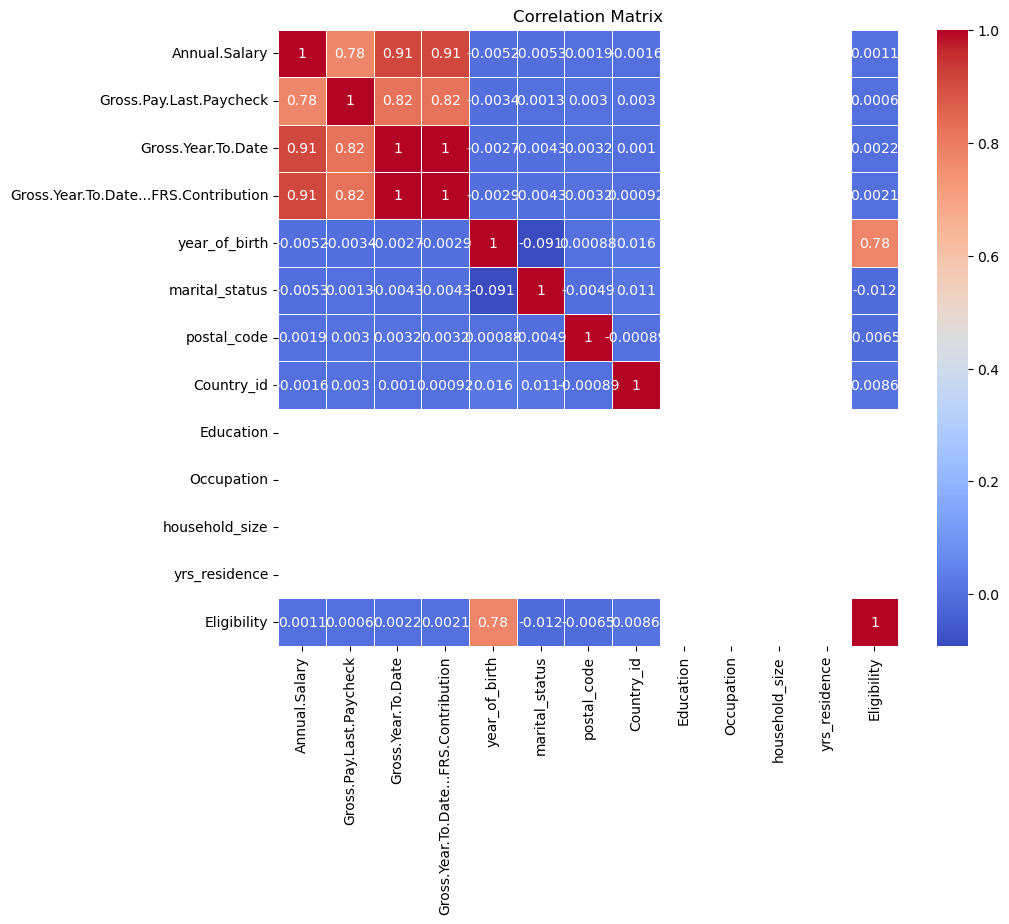

In [254]:
corr_matrix = dataset.corr()

print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Creating a bar plot and checking Accuracy scores for models

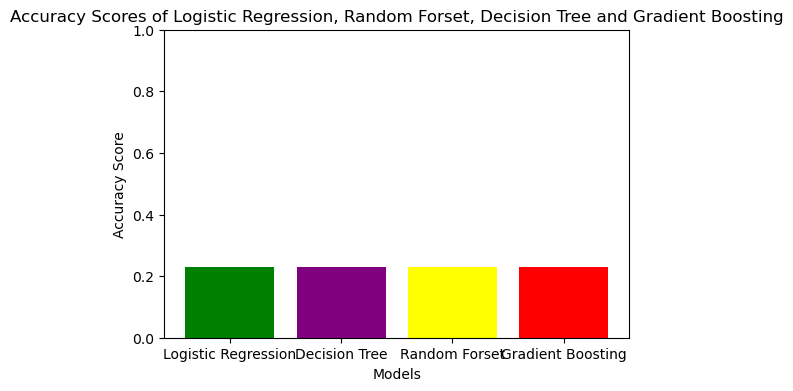

In [255]:
accuracy_scores = [accuracy_score(Y_test, Y_pred_logisticModel), accuracy_score(Y_test, Y_pred_decisionTree), accuracy_score(Y_test, Y_pred_randomForest), accuracy_score(Y_test, Y_pred_gradientBoosting)]

models = ['Logistic Regression', 'Decision Tree', 'Random Forset', 'Gradient Boosting']

plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_scores, color=['green', 'purple', 'yellow','red'])
plt.title('Accuracy Scores of Logistic Regression, Random Forset, Decision Tree and Gradient Boosting')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Setting the y-axis limit to range from 0 to 1
plt.show()

# Creating a heatmap for logistic model

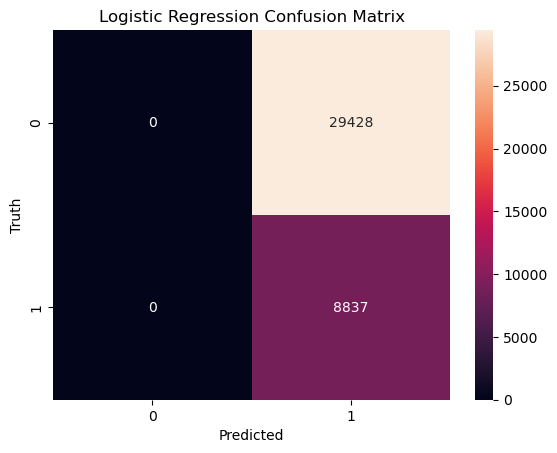

In [256]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_pred_logisticModel)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Creating a heatmap for decision tree

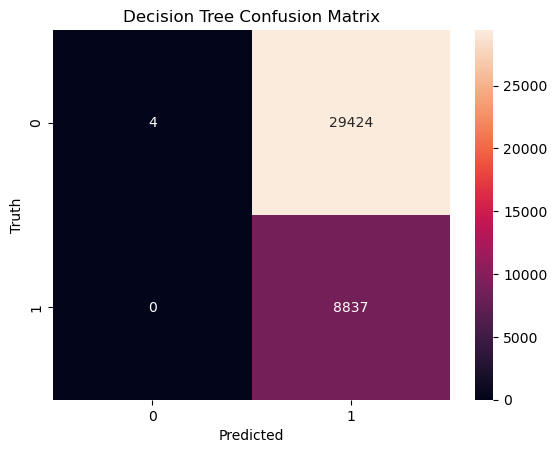

In [257]:
cm=confusion_matrix(Y_test,Y_pred_decisionTree)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Creating a heatmap for random forest

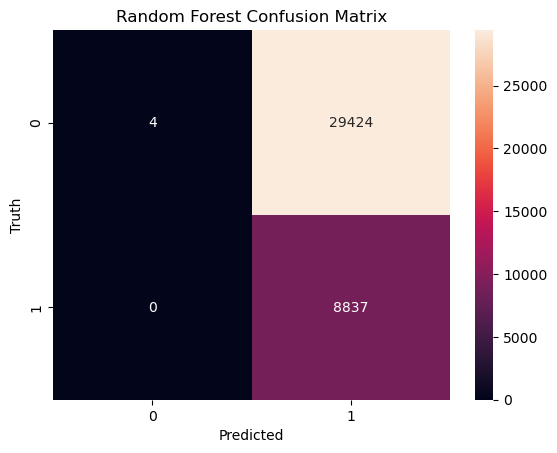

In [258]:
cm=confusion_matrix(Y_test,Y_pred_randomForest)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Creating a heatmap for gradient boosting

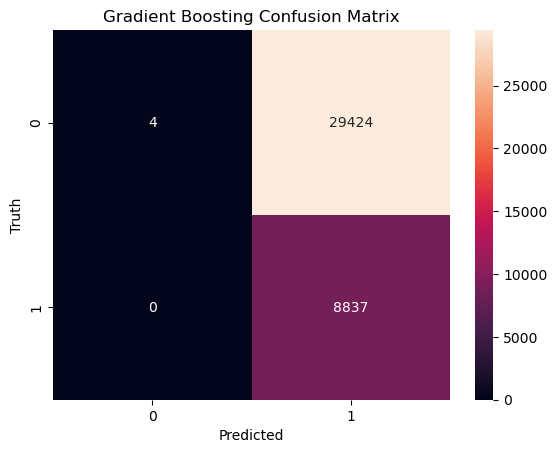

In [259]:
cm=confusion_matrix(Y_test,Y_pred_gradientBoosting)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Checking the accuracy for the train data

In [260]:
Y_train_pred = model.predict(X_train)

In [261]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

Train Accuracy: 78.4%


# Checking the accuracy for the test data

In [262]:
Y_test_pred = model.predict(X_test)

In [263]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 78.7%


# Creating a scatter plot to check the eligibility of customers

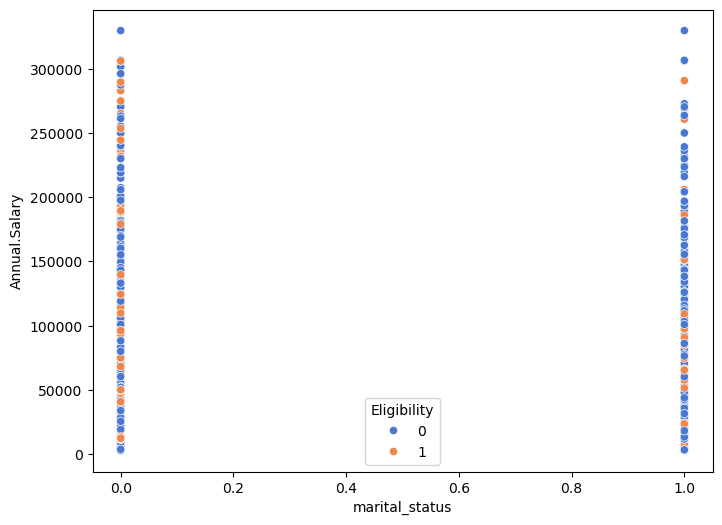

In [264]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="marital_status", y="Annual.Salary", hue="Eligibility", palette="muted", data=dataset, ax=ax)
plt.show()

# Creating calibration curve of a logistic regression model

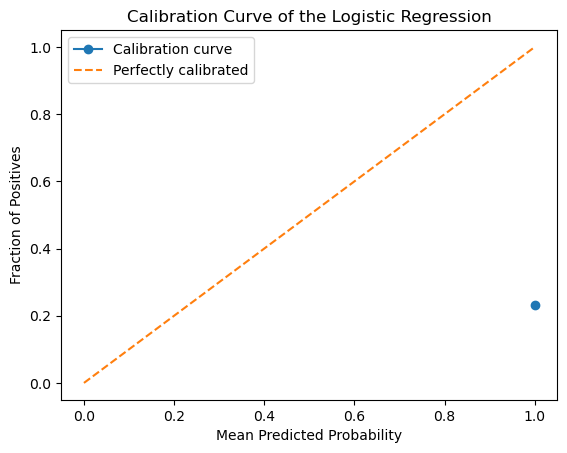

In [265]:
prob_true, prob_pred = calibration_curve(Y_test, Y_pred_logisticModel, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve of the Logistic Regression')
plt.legend()
plt.show()

# Creating calibration curve of a decision tree model

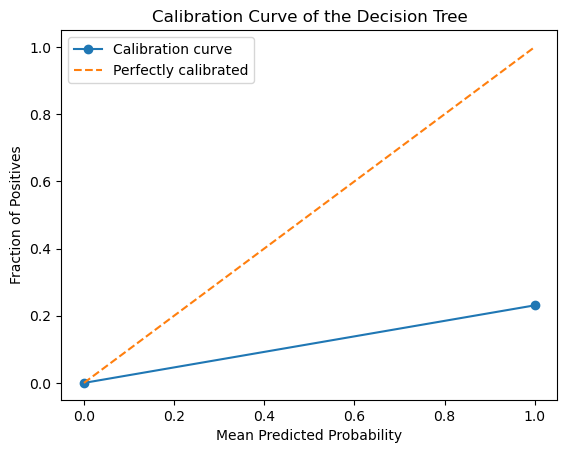

In [266]:
prob_true, prob_pred = calibration_curve(Y_test, Y_pred_decisionTree, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve of the Decision Tree')
plt.legend()
plt.show()

# Creating calibration curve of a logistic regression model

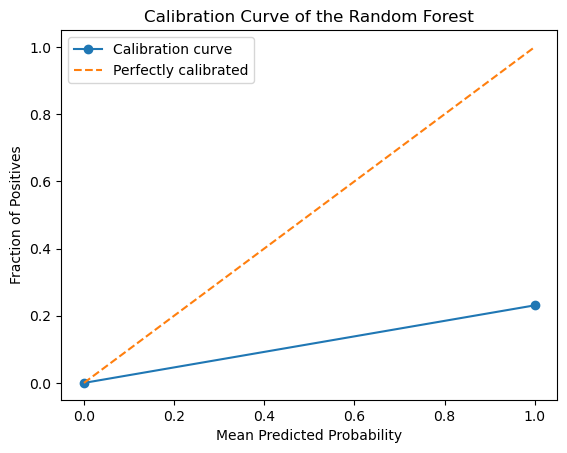

In [267]:
prob_true, prob_pred = calibration_curve(Y_test, Y_pred_randomForest, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve of the Random Forest')
plt.legend()
plt.show()

# Creating calibration curve of a gradient boosting model

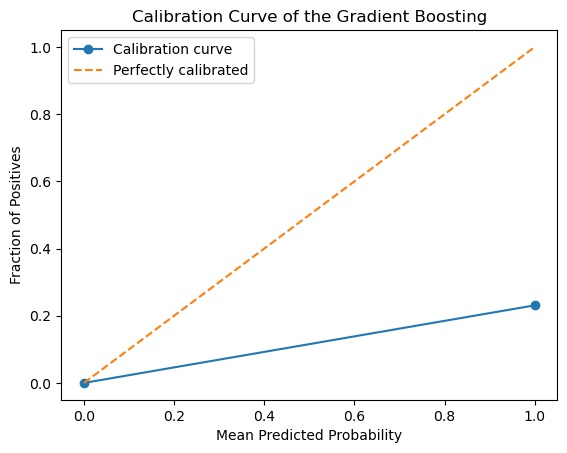

In [268]:
prob_true, prob_pred = calibration_curve(Y_test, Y_pred_gradientBoosting, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve of the Gradient Boosting')
plt.legend()
plt.show()

# Doing the probability to check if the customer will qualify for the service

In [269]:
X_point = np.array([[50000.00,  # Annual.Salary
                     1000.00,  # Gross.Pay.Last.Paycheck
                     20000.00,  # Gross.Year.To.Date
                     20000.00,  # Gross.Year.To.Date...FRS.Contribution
                     1980,  # year_of_birth
                     1,  # marital_status
                     12345,  # postal_code
                     1,  # Country_id
                    1,  # Education
                     1,  # Occupation
                     4,  # household_size
                     5]])  # yrs_residence

In [270]:
predicted_probability = model.predict_proba(X_point)[:, 1]
print(f'Probability of a customer purchasing a product is {np.round(100*predicted_probability,1)}%')

Probability of a customer purchasing a product is [100.]%
